In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import os
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm
from PIL import Image
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Dropout
from keras.models import Sequential,Input,Model

In [3]:
class_names = ['cycling','dancing','eating','hugging','sleeping','running']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [4]:
root_path1 = '/content/drive/MyDrive/Dataset/action_net_v1/train/cycling'
root_path2 = '/content/drive/MyDrive/Dataset/action_net_v1/train/dancing'
root_path3 = '/content/drive/MyDrive/Dataset/action_net_v1/train/eating'
root_path4 = '/content/drive/MyDrive/Dataset/action_net_v1/train/hugging'
root_path5 = '/content/drive/MyDrive/Dataset/action_net_v1/train/sleeping'
root_path6 = '/content/drive/MyDrive/Dataset/action_net_v1/train/running'

In [5]:
root_path11 = '/content/drive/MyDrive/Dataset/action_net_v1/test/cycling'
root_path22 = '/content/drive/MyDrive/Dataset/action_net_v1/test/dancing'
root_path33 = '/content/drive/MyDrive/Dataset/action_net_v1/test/eating'
root_path44 = '/content/drive/MyDrive/Dataset/action_net_v1/test/hugging'
root_path55 = '/content/drive/MyDrive/Dataset/action_net_v1/test/sleeping'
root_path66 = '/content/drive/MyDrive/Dataset/action_net_v1/test/running'

In [6]:
data_list=[]
labels_list=[]

In [7]:
for i in os.listdir(root_path1):
        img_path=os.path.join("/content/drive/MyDrive/Dataset/action_net_v1/train/cycling", i)
        img = Image.open(img_path)
        img = img.resize((150, 150))
        img = np.array(img)
        data_list.append(img)
        labels_list.append("cycling")

In [8]:
for i in os.listdir(root_path2):
        img_path=os.path.join("/content/drive/MyDrive/Dataset/action_net_v1/train/dancing", i)
        img = Image.open(img_path)
        img = img.resize((150, 150))
        img = np.array(img)
        data_list.append(img)
        labels_list.append("dancing")

In [9]:
for i in os.listdir(root_path3):
        img_path=os.path.join("/content/drive/MyDrive/Dataset/action_net_v1/train/eating", i)
        img = Image.open(img_path)
        img = img.resize((150, 150))
        img = np.array(img)
        data_list.append(img)
        labels_list.append("eating")

In [10]:
for i in os.listdir(root_path4):
        img_path=os.path.join("/content/drive/MyDrive/Dataset/action_net_v1/train/hugging", i)
        img = Image.open(img_path)
        img = img.resize((150, 150))
        img = np.array(img)
        data_list.append(img)
        labels_list.append("hugging")

In [11]:
for i in os.listdir(root_path5):
        img_path=os.path.join("/content/drive/MyDrive/Dataset/action_net_v1/train/sleeping", i)
        img = Image.open(img_path)
        img = img.resize((150, 150))
        img = np.array(img)
        data_list.append(img)
        labels_list.append("sleeping")

In [12]:
for i in os.listdir(root_path6):
        img_path=os.path.join("/content/drive/MyDrive/Dataset/action_net_v1/train/running", i)
        img = Image.open(img_path)
        img = img.resize((150, 150))
        img = np.array(img)
        data_list.append(img)
        labels_list.append("running")

In [13]:
data = np.array(data_list)

In [14]:
from sklearn import preprocessing 
my_label = preprocessing.LabelEncoder()   
labels= my_label.fit_transform(labels_list)

In [15]:
data_list1=[]
labels_list1=[]

In [16]:
for i in os.listdir(root_path11):
        img_path=os.path.join("/content/drive/MyDrive/Dataset/action_net_v1/test/cycling", i)
        img = Image.open(img_path)
        img = img.resize((150, 150))
        img = np.array(img)
        data_list1.append(img)
        labels_list1.append("cycling")

In [17]:
for i in os.listdir(root_path22):
        img_path=os.path.join("/content/drive/MyDrive/Dataset/action_net_v1/test/dancing", i)
        img = Image.open(img_path)
        img = img.resize((150, 150))
        img = np.array(img)
        data_list1.append(img)
        labels_list1.append("dancing")

In [18]:
for i in os.listdir(root_path33):
        img_path=os.path.join("/content/drive/MyDrive/Dataset/action_net_v1/test/eating", i)
        img = Image.open(img_path)
        img = img.resize((150, 150))
        img = np.array(img)
        data_list1.append(img)
        labels_list1.append("eating")

In [19]:
for i in os.listdir(root_path44):
        img_path=os.path.join("/content/drive/MyDrive/Dataset/action_net_v1/test/hugging", i)
        img = Image.open(img_path)
        img = img.resize((150, 150))
        img = np.array(img)
        data_list1.append(img)
        labels_list1.append("hugging")

In [20]:
for i in os.listdir(root_path55):
        img_path=os.path.join("/content/drive/MyDrive/Dataset/action_net_v1/test/sleeping", i)
        img = Image.open(img_path)
        img = img.resize((150, 150))
        img = np.array(img)
        data_list1.append(img)
        labels_list1.append("sleeping")

In [21]:
for i in os.listdir(root_path66):
        img_path=os.path.join("/content/drive/MyDrive/Dataset/action_net_v1/test/running", i)
        img = Image.open(img_path)
        img = img.resize((150, 150))
        img = np.array(img)
        data_list1.append(img)
        labels_list1.append("running")

In [22]:
data1 = np.array(data_list1)

In [23]:
from sklearn import preprocessing 
my_label = preprocessing.LabelEncoder()   
labels1= my_label.fit_transform(labels_list1)

In [24]:
train_images, train_labels = shuffle(data, labels, random_state=25)

In [25]:
test_images, test_labels = shuffle(data1, labels1, random_state=25)

In [26]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]
print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 6000
Number of testing examples: 1200
Each image is of size: (150, 150)


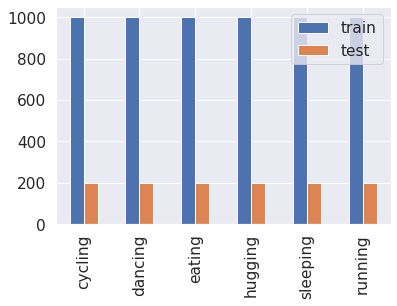

In [27]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

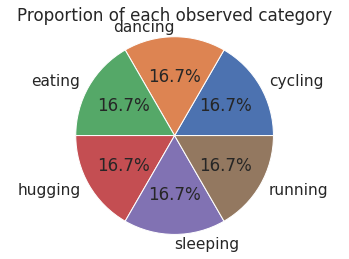

In [28]:
plt.pie(train_counts,
        explode=(0, 0, 0, 0, 0, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

In [29]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [30]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

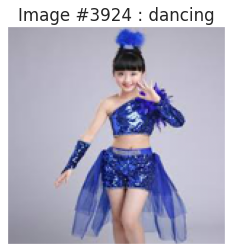

In [31]:
display_random_image(class_names, train_images, train_labels)

In [32]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

In [33]:
# Build the model
shape = (150,150,3)
input = Input(shape=shape)

basemodel = InceptionV3(include_top=False, weights='imagenet', input_shape=shape, pooling='avg')
basemodel.trainable = False

x = basemodel(input)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
output = Dense(6, activation='softmax')(x)        
model = Model(input,output)


87924736/87910968 [==============================] - 1s 0us/step


In [34]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer = RMSprop(learning_rate=0.0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['acc'])

In [35]:
history=model.fit(train_images,train_labels,epochs=15,validation_data=(test_images,test_labels))

Epoch 1/15
188/188 [==============================] - 45s 160ms/step - loss: 0.7906 - acc: 0.7270 - val_loss: 0.6309 - val_acc: 0.7825
Epoch 2/15
188/188 [==============================] - 26s 140ms/step - loss: 0.4635 - acc: 0.8337 - val_loss: 0.5773 - val_acc: 0.8058
Epoch 3/15
188/188 [==============================] - 26s 141ms/step - loss: 0.3540 - acc: 0.8672 - val_loss: 0.6047 - val_acc: 0.7925
Epoch 4/15
188/188 [==============================] - 27s 142ms/step - loss: 0.2869 - acc: 0.8987 - val_loss: 0.5682 - val_acc: 0.8117
Epoch 5/15
188/188 [==============================] - 26s 141ms/step - loss: 0.2191 - acc: 0.9210 - val_loss: 0.6499 - val_acc: 0.7950
Epoch 6/15
188/188 [==============================] - 27s 146ms/step - loss: 0.1850 - acc: 0.9357 - val_loss: 0.6278 - val_acc: 0.8117
Epoch 7/15
188/188 [==============================] - 26s 141ms/step - loss: 0.1453 - acc: 0.9545 - val_loss: 0.6022 - val_acc: 0.8208
Epoch 8/15
188/188 [==============================] - 2

In [36]:
Loss, Accuracy = model.evaluate(test_images,test_labels)

print('Loss is: ', Loss)
print('Accuracy is: ', Accuracy)

38/38 [==============================] - 5s 127ms/step - loss: 0.7641 - acc: 0.8225
Loss is:  0.7641053199768066
Accuracy is:  0.8224999904632568


In [37]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [38]:
import tensorflow as tf
from tensorboard.plugins.hparams import api as hp

In [39]:
HP_NUM_UNITS = hp.HParam('num_units', hp.Discrete([16, 32]))
HP_DROPOUT = hp.HParam('dropout', hp.RealInterval(0.1, 0.2))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'sgd']))

METRIC_ACCURACY = 'accuracy'

with tf.summary.create_file_writer('logs/hparam_tuning').as_default():
  hp.hparams_config(
    hparams=[HP_NUM_UNITS, HP_DROPOUT, HP_OPTIMIZER],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )

In [40]:
def train_test_model(hparams):
  shape = (150,150,3)
  input = Input(shape=shape)
  basemodel = InceptionV3(include_top=False, weights='imagenet', input_shape=shape, pooling='avg')
  basemodel.trainable = False
  x = basemodel(input)
  x = Dense(1024, activation='relu')(x)
  x = Dropout(0.2)(x)
  output = Dense(6, activation='softmax')(x)        
  model = Model(input,output)
  model.compile(optimizer = RMSprop(learning_rate=0.0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['acc'])
  model.fit(train_images, train_labels, epochs=1) # Run with 1 epoch to speed things up for demo purposes
  _, accuracy = model.evaluate(test_images, test_labels)
  
  return accuracy

In [41]:
def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = train_test_model(hparams)
    tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)

In [ ]:
session_num = 0

for num_units in HP_NUM_UNITS.domain.values:
  for dropout_rate in (HP_DROPOUT.domain.min_value, HP_DROPOUT.domain.max_value):
    for optimizer in HP_OPTIMIZER.domain.values:
      hparams = {
          HP_NUM_UNITS: num_units,
          HP_DROPOUT: dropout_rate,
          HP_OPTIMIZER: optimizer,
      }
      run_name = "run-%d" % session_num
      print('--- Starting trial: %s' % run_name)
      print({h.name: hparams[h] for h in hparams})
      run('logs/hparam_tuning/' + run_name, hparams)
      session_num += 1

--- Starting trial: run-0
{'num_units': 16, 'dropout': 0.1, 'optimizer': 'adam'}
